# TITLE

"ESTIMACION SOBRE LAS NECESIDADES DEL AREA DE SERVICIOS SOCIALES DEL AYUNTAMIENTO DE MADRID" 

## SUBJECT:

"HACER UNA ESTIMACION GLOBAL Y PARCIAL DE LAS NECESIDADES A ATENDER EN EL AREA DE SERVICIOS SOCIALES DEL AYUNTAMIENTO DE MADRID"

Se tomarán los datos de los últimos años y se realizará una estimación global para el año XXXX y por trimestre.

### HYPOTHESIS: (ESTO HAY QUE HACERLO)
hipotesis_1 = "Hay mucha demanda de ayudas y servicios sociales en determinados distritos (valorar si es en todos) y poco personal para absorber esta demanda"

hipotesis_2 = "Valorar si hay suficientes recursos no humanos para atender las demandas de los usuarios"

In [2]:
"""
IMPORTS
"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xlrd
import squarify
import folium 
from folium import plugins
import ipywidgets
import geocoder
import geopy
from vega_datasets import data as vds
from branca.element import Figure

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

### 1.- Data Collection:

La fuente principal de todos los datos obtenidos ha sido a través de las páginas del ayuntamiento de Madrid (MUNIMADRID y PORTAL DE DATOS ABIERTOS DEL AYUNTAMIENTO DE MADRID)


In [ ]:
# guarda en variables los datasets y su fuente

# df_demandas = pd.DataFrame()
# URL_demandas_de_servicio="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=40ab4e8b0327d610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# Solicitudes de procesos solicitados por los usuarios

# df_urgencias = pd.DataFrame()
# URL_urgencias_atendidas="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=0b006dace9578610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# URGENCIAS ATENDIDAS EN LOS CENTROS. ESTAS URGENCIAS SON DE LA SIGUIENTES TIPOLOGIAS 
# Malos tratos                                      --      Código: 10
# Abandono                                          --      Código: 20
# Alojamiento/Vivienda                              --      Código: 30
# Desprotección social problema salud               --      Código: 40
# Desprotección socio-familiar                      --      Código: 50

# df_centros_sociales = pd.DataFrame()
# URL_centros_sociales="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c123e08dafc8410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# Listado con geoposicionamiento de los diferentes centros sociales que se encuentran en Madrid, tanto del ayuntamiento como otros que no son del ayuntamiento (por ejemplo el Centro de Atención Social del "Casino de la Reina").


### 2.- Data Extraction from different Datasets and storage in data\Outcomes

Vamos a tomar los datos de los años __desde el 2018 al 2021__.

Los datos de este último año no están completos. Solo hay hasta el mes de Julio.

In [4]:
df_2021=pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Incomes\servicios_sociales_urgencias_2021.csv",sep=';',encoding='ISO-8859-1',index_col='Secuencia')   
#Este  dataset solo contine información hasta julio de 2021
df_2020=pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Incomes\servicios_sociales_urgencias_2020.csv",sep=';',encoding='utf-8',index_col='Secuencia')

df_2019=pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Incomes\servicios_sociales_urgencias_2019.csv",sep=';',encoding='ISO-8859-1',index_col='Secuencia')

df_2018=pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Incomes\servicios_sociales_urgencias_2018.csv",sep=';',encoding='ISO-8859-1',index_col='Secuencia')

In [ ]:
df_urgencias=pd.concat([df_2020,df_2019,df_2018], ignore_index=True)
df_urgencias

In [6]:
df_urgencias.drop(['Código Distrito','Distrito','Código Barrio','Barrio','Sección Censal'],axis=1,inplace=True)
df_urgencias

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
0,69,CSS José Villarreal,2,ARGANZUELA,50 - 54,Española,H,1,Primera Atención,50.0,Desprotección socio-familiar,02/01/2020
1,69,CSS José Villarreal,2,ARGANZUELA,>= 85,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,02/01/2020
2,69,CSS José Villarreal,2,ARGANZUELA,60 - 64,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,02/01/2020
3,69,CSS José Villarreal,2,ARGANZUELA,75 - 79,Española,H,1,Primera Atención,40.0,Desproteccion social problema salud,02/01/2020
4,99,CSS Teresa de Calcuta,21,BARAJAS,40 - 44,Española,M,2,Zona / Historia Social,50.0,Desprotección socio-familiar,02/01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
35275,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30 - 34,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
35276,85,CSS Loyola de Palacio,12,USERA,>= 85,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018
35277,84,CSS San Filiberto,12,USERA,35 - 39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
35278,84,CSS San Filiberto,12,USERA,65 - 69,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018


In [7]:
df_urgencias.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias.csv',header=True,index=False)

### 3.- Featuring Engineering

In [ ]:
df_urgencias= pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias.csv",sep=',')
df_urgencias

Vamos a agrupar las __fechas de edades__ para tener un rango más manejable.

Así agruparemos < 18 años a todos los grupos que sean inferiores a esta edad.

Agruparemos >65 a todos los grupos que sean superiores a esta edad.

Agruparemos de 10 en 10 años al resto.

In [10]:
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace(' - ','-')
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace('- ','-')
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace('= ','=')

In [ ]:
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A4-11", "<=18")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A12-17", "<=18")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A0-3", "<=18") 

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A18-24", "19-29")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A25-29", "19-29")

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A30-34", "30-39")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A35-39", "30-39")

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A40-44", "40-49")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A44-49", "40-49")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A45-49", "40-49")

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A50-54", "50-59")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A55-59", "50-59")

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A60-64", "60-64")

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A65-69", ">=65")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A75-79", ">=65")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A80-84", ">=65")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A70-74", ">=65")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A>=85", ">=65")

#df_demandas


In [12]:
df_urgencias['Tramo Edad'].value_counts()

>=65     10793
30-39     7305
40-49     6921
50-59     4355
19-29     4168
60-64     1481
<=18       187
            70
Name: Tramo Edad, dtype: int64

In [13]:
lista_rango_edad=df_urgencias['Tramo Edad'].unique()                  # Hay que revisar esto, porque no está ordenado y sería lo ideal
lista_rango_edad.sort()
mivalor = [ x for x in range(len(lista_rango_edad))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
mivalor
lista_rango_edad=list(lista_rango_edad)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 

Age_range_code = {k: v for k, v in zip(lista_rango_edad, mivalor)}   ##  sustituirlo por cero
Age_range_code
df_urgencias['Age_range_code']= df_urgencias['Tramo Edad'].map(Age_range_code)

Los valores son: {nulos: 0, 19-29: 1, 30-39: 2, 40-49: 3, 50-59: 4, 60-64: 5, <=18: 6, >=65: 7}

Vamos a dar un formato numérico a la __nacionalidad__ del usuario, siendo los valores: 

0 para Española, 1 para Extranjera

In [ ]:
lista_nacionalidad=df_urgencias['Nacionalidad'].unique()
lista_nacionalidad.sort()
lista_nacionalidad
mivalor = [ x for x in range(len(lista_nacionalidad))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
#mivalor    
lista_nacionalidad=list(lista_nacionalidad)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 
Nationality_code = {k: v for k, v in zip(lista_nacionalidad, mivalor)}   ##  sustituirlo por cero
df_urgencias['Nationality_code']= df_urgencias['Nacionalidad'].map(Nationality_code)
df_urgencias

In [15]:
df_urgencias['Sexo'].value_counts()             #Solo hay 1 dato vacio en el DataFrame por lo que lo sustituiremos por M, que es la moda

M    24847
H    10432
         1
Name: Sexo, dtype: int64

In [16]:
df_urgencias['Sexo']=df_urgencias['Sexo'].mask(df_urgencias['Sexo'] == ' ').fillna('M')

Vamos a dar un formato numérico al __sexo__ del usuario, siendo los valores: 

0 para H, 1 para M

In [ ]:
lista_sexo=df_urgencias['Sexo'].unique()
lista_sexo.sort()
lista_sexo
mivalor = [ x for x in range(len(lista_sexo))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
#mivalor    
lista_sexo=list(lista_sexo)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 

Sex_code = {k: v for k, v in zip(lista_sexo, mivalor)}   ##  sustituirlo por cero

df_urgencias['Sex_code']= df_urgencias['Sexo'].map(Sex_code)
df_urgencias

In [18]:
df_urgencias['Tipo Supuesto Urgente'].unique()          #   Vemos que hay valores nulos en el campo a valorar, por lo que vamos a ver cuantos son y ver la posibilidad de sustituirlos por otros.
                                                        #   Esto lo haremos en cada Dataset descargado para así que sea más "asumible" la tarea

array(['Desprotección socio-familiar',
       'Desproteccion social problema salud', 'Alojamiento/Vivienda', nan,
       'Malos Tratos', 'Abandono'], dtype=object)

In [19]:
df_urgencias['Tipo Supuesto Urgente'].isnull().sum()

2018

Se puede ver que hay muchos en esta columna con __NaN__ (2018).

Vamos a dar un formato de fecha año y trimestre a los valores de 'Fecha Demanda' para poder ver qué evolución tienen los datos en el tiempo.

In [ ]:
df_urgencias['Fecha Cita'] = pd.to_datetime(df_urgencias['Fecha Cita'], dayfirst=True)

df_urgencias['year'] = df_urgencias['Fecha Cita'].dt.year
#df_demandas['month'] = df_demandas['Timestamp'].dt.month
df_urgencias['Quarteryear'] = df_urgencias['Fecha Cita'].dt.quarter
df_urgencias

In [21]:
df_urgencias_prueba=df_urgencias.drop(['Código Centro'],axis=1)
col = df_urgencias_prueba.pop('Código Tipo Supuesto Urgente')
df_urgencias_prueba.insert(loc= 0 , column= 'Código Tipo Supuesto Urgente', value= col)

In [ ]:
df_urgencias_prueba.info()

Como podemos observar no están todos los valores de __'Código Tipo Supuesto Urgente'__ ni de __'Tipo Supuesto Urgente'__, por lo que nos vemos obligados a realizar un nuevo proceso de ingeniería de datos para darles un valor a estas columnas, que serán la variable dependiente.

Para esto realizaremos nuevamente el proceso a partir de los DataSets originales y volveremos a realizar toda esta ingeniería.

### 4.- Reconstruction Dataframes

In [ ]:
df_2021_correccion=df_2021
df_2021_correccion.describe(include='all')                  #   Vamos a ver las características de las columnas 'Código Tipo Supuesto Urgente' y 'Tipo Supuesto Urgente',
                                                            #   que están relacionadas entre sí y dónde están los valores NaN que hay que sustituir.

In [ ]:
print("Los valores NaN que hay en este Dataset son: ",df_2021['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2021))
df_2021['Código Tipo Supuesto Urgente'].value_counts()

In [ ]:
df_2021_correccion['Código Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
df_2021_correccion['Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
'''Verificamos'''
print("Los valores NaN que hay en este Dataset son: ",df_2021_correccion['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2021_correccion))
df_2021['Código Tipo Supuesto Urgente'].value_counts()
print("Los valores NaN que hay en este Dataset son: ",df_2021_correccion['Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2021_correccion))
df_2021_correccion['Tipo Supuesto Urgente'].value_counts()

En este Dataframe vemos que la media de **'Código Tipo Supuesto Urgente'** se aproxima a la mediana.

Este tipo de dato, aunque es numérico, es categorico y solo tienen valores de 10,20,30,40 y 50.

Hay 166 datos vacíos, los rellenaremos con los datos del registro anterior.

In [ ]:
df_2021_correccion.groupby('Código Tipo Supuesto Urgente')['Tipo Supuesto Urgente'].value_counts()

In [ ]:
df_2020_correccion=df_2020
df_2020_correccion.describe(include='all')                  #   Vamos a ver las características de las columnas 'Código Tipo Supuesto Urgente' y 'Tipo Supuesto Urgente',
                                                            #   que están relacionadas entre sí y dónde están los valores NaN que hay que sustituir.

In [ ]:
print("Los valores NaN que hay en este Dataset son: ",df_2020['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2020))
df_2020['Código Tipo Supuesto Urgente'].value_counts()

En este Dataframe vemos que la mediana de **'Código Tipo Supuesto Urgente'** tiene muchos valores en 50 y la media está entre 40 y 50 también, lo que indica que en general casi todos los registros se situan entre 40 y 50.

Este tipo de dato, aunque es numérico, es categorico y solo tienen valores de 10,20,30,40 y 50.

Hay 1402 datos vacíos, los rellenaremos con los datos del registro anterior, que principalmente serán éstos.

In [ ]:
df_2020_correccion['Código Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
df_2020_correccion['Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
'''Verificamos'''
print("Los valores NaN que hay en este Dataset son: ",df_2020_correccion['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2020_correccion))
print("Los valores NaN que hay en este Dataset son: ",df_2020_correccion['Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2020_correccion))
df_2020_correccion.groupby('Código Tipo Supuesto Urgente')['Tipo Supuesto Urgente'].value_counts()

In [ ]:
df_2019_correccion=df_2019
df_2019_correccion.describe(include='all')                  #   Vamos a ver las características de las columnas 'Código Tipo Supuesto Urgente' y 'Tipo Supuesto Urgente',
                                                            #   que están relacionadas entre sí y dónde están los valores NaN que hay que sustituir.

In [ ]:
print("Los valores NaN que hay en este Dataset son: ",df_2019['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2019))
df_2019['Código Tipo Supuesto Urgente'].value_counts()

En este Dataframe vemos que la mediana de **'Código Tipo Supuesto Urgente'** tiene muchos valores en 40 y la media está entre 30 y 40 también, lo que indica que en general casi todos los registros se situan entre 30 y 40.

Este tipo de dato, aunque es numérico, es categorico y solo tienen valores de 10,20,30,40 y 50.

Hay 298 datos vacíos, los rellenaremos con los datos del registro anterior, que principalmente serán éstos.

In [ ]:
df_2019_correccion['Código Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
df_2019_correccion['Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
'''Verificamos'''
print("Los valores NaN que hay en este Dataset son: ",df_2019_correccion['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2019_correccion))
print("Los valores NaN que hay en este Dataset son: ",df_2019_correccion['Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2019_correccion))
df_2019_correccion.groupby('Código Tipo Supuesto Urgente')['Tipo Supuesto Urgente'].value_counts()

In [ ]:
df_2018_correccion=df_2018
df_2018_correccion.describe(include='all')                  #   Vamos a ver las características de las columnas 'Código Tipo Supuesto Urgente' y 'Tipo Supuesto Urgente',
                                                            #   que están relacionadas entre sí y dónde están los valores NaN que hay que sustituir.

In [ ]:
print("Los valores NaN que hay en este Dataset son: ",df_2018['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2018))
df_2018['Código Tipo Supuesto Urgente'].value_counts()

En este Dataframe vemos que la mediana y la media de **'Código Tipo Supuesto Urgente'** tienen valores en torno a 40 (siendo está la mediana), pero el reparto es más amplio.

Este tipo de dato, aunque es numérico, es categorico y solo tienen valores de 10,20,30,40 y 50.

Hay 318 datos vacíos, los rellenaremos con los datos del registro anterior, que principalmente serán éstos.

In [ ]:
df_2018_correccion['Código Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
df_2018_correccion['Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
'''Verificamos'''
print("Los valores NaN que hay en este Dataset son: ",df_2018_correccion['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2018_correccion))
print("Los valores NaN que hay en este Dataset son: ",df_2018_correccion['Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2018_correccion))
df_2018_correccion.groupby('Código Tipo Supuesto Urgente')['Tipo Supuesto Urgente'].value_counts()

In [ ]:
df_urgencias_correccion=pd.concat([df_2020_correccion,df_2019_correccion,df_2018_correccion], ignore_index=True)
df_urgencias_correccion

In [37]:
df_urgencias_correccion.drop(['Código Distrito','Distrito','Código Barrio','Barrio','Sección Censal'],axis=1,inplace=True)
df_urgencias_correccion.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_corregido.csv',header=True,index=False)

### 5 - Data Engineering

Vamos a agrupar las __fechas de edades__ para tener un rango más manejable.

Así agruparemos < 18 años a todos los grupos que sean inferiores a esta edad.

Agruparemos >65 a todos los grupos que sean superiores a esta edad.

Agruparemos de 10 en días años al resto.

In [ ]:
df_urgencias_corregido= pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_corregido.csv",sep=',')
df_urgencias_corregido

In [ ]:
df_urgencias_corregido['Tramo Edad'].value_counts()

Vemos que hay __70 registros en blanco__ que no hemos sustituido anteriormente.

Vamos a proceder a reemplazarlos por el registro anterior, ya que no afectará mucho a las previsiones del módelo.

In [40]:
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].mask(df_urgencias_corregido['Tramo Edad'] == ' ')
df_urgencias_corregido.fillna(method='ffill',inplace=True)

Hay que eliminar los espacios en blanco entre -

In [41]:
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace(' - ','-')
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace('- ','-')
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace('= ','=')

In [ ]:
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A4-11", "<=18")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A12-17", "<=18")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A0-3", "<=18") 

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A18-24", "19-29")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A25-29", "19-29")

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A30-34", "30-39")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A35-39", "30-39")

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A40-44", "40-49")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A44-49", "40-49")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A45-49", "40-49")

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A50-54", "50-59")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A55-59", "50-59")

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A60-64", "60-64")

df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A65-69", ">=65")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A75-79", ">=65")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A80-84", ">=65")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A70-74", ">=65")
df_urgencias_corregido['Tramo Edad']=df_urgencias_corregido['Tramo Edad'].str.replace("\A>=85", ">=65")

#df_demandas


In [ ]:
'''Verificamos que ya no hay valores nulos'''
print(df_urgencias_corregido['Tramo Edad'].value_counts())
print("Los valores nulos que hay actualmente en este DataFrame son: ",df_urgencias_corregido['Tramo Edad'].isnull().sum())

Los valores son: {19-29: 0, 30-39: 1, 40-49: 2, 50-59: 3, 60-64: 4, <=18: 5, >=65: 6}

In [44]:
lista_rango_edad=df_urgencias_corregido['Tramo Edad'].unique()                  # Hay que revisar esto, porque no está ordenado y sería lo ideal
lista_rango_edad.sort()
mivalor = [ x for x in range(len(lista_rango_edad))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
mivalor
lista_rango_edad=list(lista_rango_edad)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 

Age_range_code = {k: v for k, v in zip(lista_rango_edad, mivalor)}   ##  sustituirlo por cero
Age_range_code
df_urgencias_corregido['Age_range_code']= df_urgencias_corregido['Tramo Edad'].map(Age_range_code)

Vamos a dar un formato numérico a la __nacionalidad__ del usuario, siendo los valores: 

0 para Española, 1 para Extranjera

In [ ]:
lista_nacionalidad=df_urgencias_corregido['Nacionalidad'].unique()
lista_nacionalidad.sort()
lista_nacionalidad
mivalor = [ x for x in range(len(lista_nacionalidad))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
#mivalor    
lista_nacionalidad=list(lista_nacionalidad)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 
Nationality_code = {k: v for k, v in zip(lista_nacionalidad, mivalor)}   ##  sustituirlo por cero
df_urgencias_corregido['Nationality_code']=df_urgencias_corregido['Nacionalidad'].map(Nationality_code)
df_urgencias_corregido

In [ ]:
df_urgencias_corregido['Sexo'].value_counts()             #Solo hay 1 dato vacio en el DataFrame por lo que lo sustituiremos por M, que es la moda

In [47]:
df_urgencias_corregido['Sexo']=df_urgencias_corregido['Sexo'].mask(df_urgencias_corregido['Sexo'] == ' ').fillna('M')

Vamos a dar un formato numérico al __sexo__ del usuario, siendo los valores: 

0 para H, 1 para M

In [ ]:
lista_sexo=df_urgencias_corregido['Sexo'].unique()
lista_sexo.sort()
lista_sexo
mivalor = [ x for x in range(len(lista_sexo))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
#mivalor    
lista_sexo=list(lista_sexo)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 

Sex_code = {k: v for k, v in zip(lista_sexo, mivalor)}   ##  sustituirlo por cero

df_urgencias_corregido['Sex_code']= df_urgencias_corregido['Sexo'].map(Sex_code)
df_urgencias_corregido

Vamos a dar un formato de fecha año y trimestre a los valores de 'Fecha Demanda' para poder ver qué evolución tienen los datos en el tiempo

In [ ]:
df_urgencias_corregido['Fecha Cita'] = pd.to_datetime(df_urgencias_corregido['Fecha Cita'], dayfirst=True)

df_urgencias_corregido['year'] = df_urgencias_corregido['Fecha Cita'].dt.year
#df_demandas['month'] = df_demandas['Timestamp'].dt.month
df_urgencias_corregido['Quarteryear'] = df_urgencias_corregido['Fecha Cita'].dt.quarter
df_urgencias_corregido

In [53]:
df_urgencias_corregido_prueba=df_urgencias_corregido.drop(['Código Centro'],axis=1)

In [54]:
col = df_urgencias_corregido_prueba.pop('Código Tipo Supuesto Urgente')
df_urgencias_corregido_prueba.insert(loc= 0 , column= 'Código Tipo Supuesto Urgente', value= col)

In [55]:
df_urgencias_corregido_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35280 entries, 0 to 35279
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Código Tipo Supuesto Urgente  35280 non-null  float64       
 1   Centro                        35280 non-null  object        
 2   Código Distrito Centro        35280 non-null  int64         
 3   Distrito Centro               35280 non-null  object        
 4   Tramo Edad                    35280 non-null  object        
 5   Nacionalidad                  35280 non-null  object        
 6   Sexo                          35280 non-null  object        
 7   Código Tipo Atención          35280 non-null  int64         
 8   Tipo Atención                 35280 non-null  object        
 9   Tipo Supuesto Urgente         35280 non-null  object        
 10  Fecha Cita                    35280 non-null  datetime64[ns]
 11  Age_range_code              

In [56]:
df_urgencias_corregido_prueba.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_corregido_prueba.csv',header=True,index=False)

### 6 - Exploratory Data Analysis

Vamos a hacer unas gráficas para valorar los datos que disponemos.

Más gráficas en __Tableau__

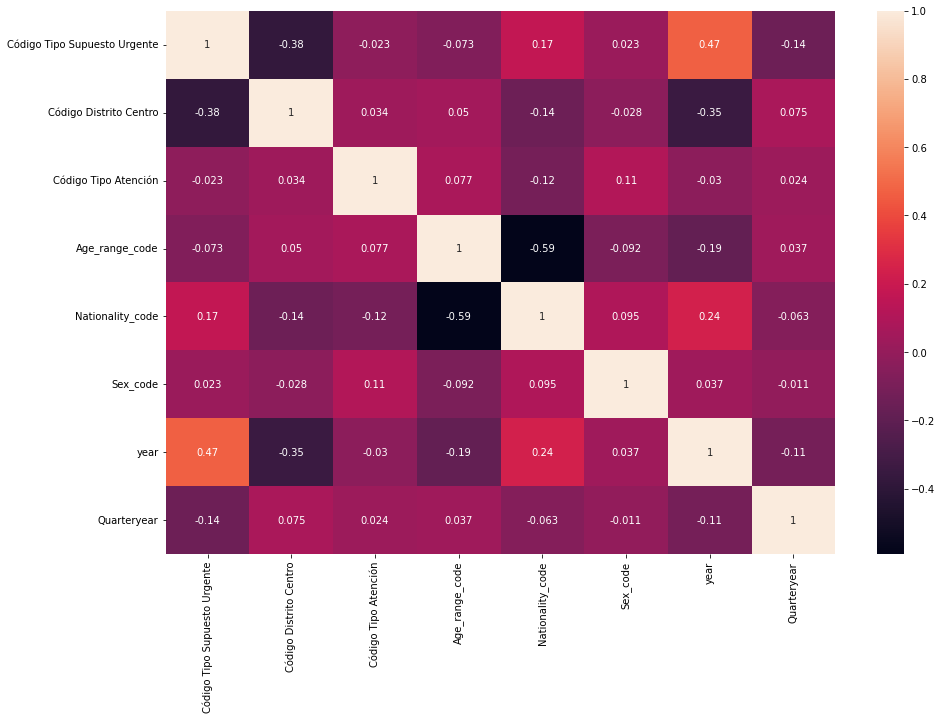

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(df_urgencias_corregido_prueba.corr(), annot=True);

Se observa que hay cierta correlación entre los parámetros de **year**, **Nationality_code**,**Código Distrito Centro**.

También se observa que no hay aparente correlación con los parámetros **Código Tipo Atención**,**Age_range_code** y **Sex_code**.

**year** también parece tener correlación con otros parámetros como **Nationality_code** o **Código Distrito centro**.

**Nationality code** y **Age_range_code** parece que también tiene una cierta correlación.

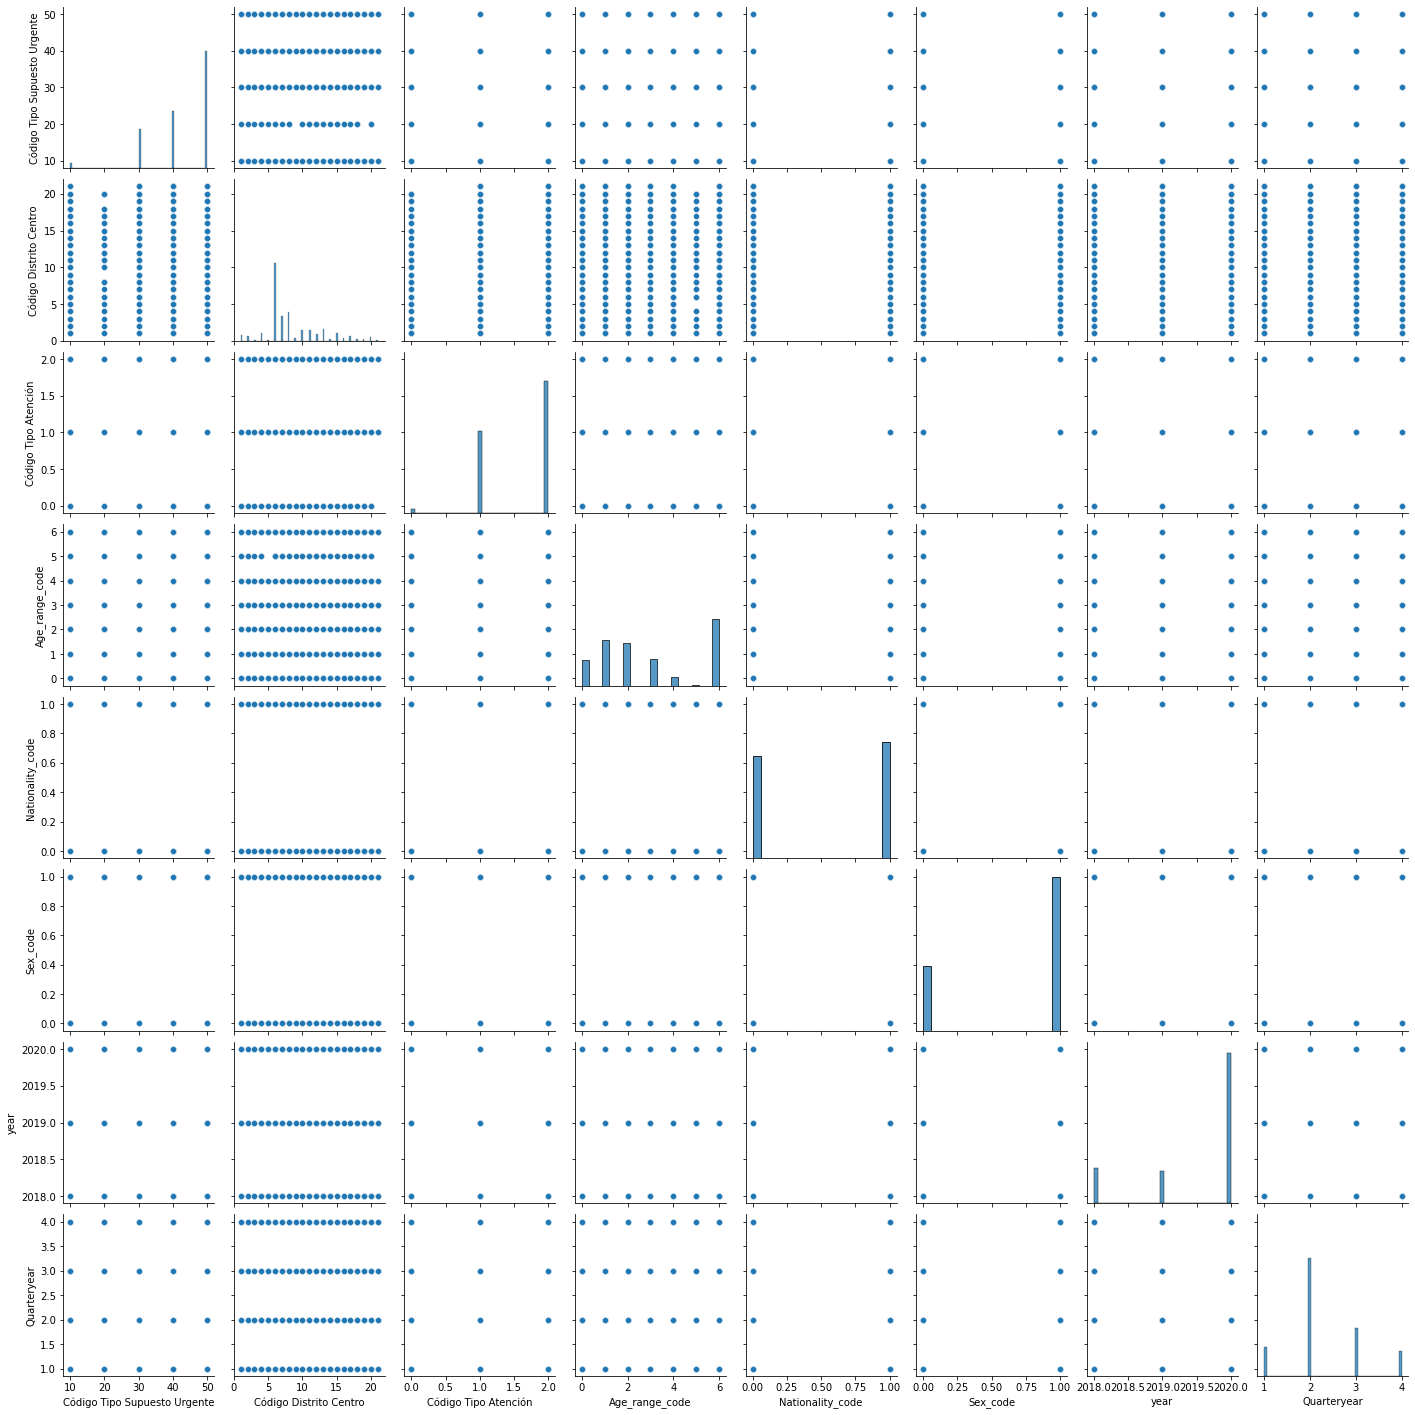

In [58]:
sns.pairplot(df_urgencias_corregido_prueba);

En este **pairplot** se ve claramente que los valores no son continuos, sino discretos.

Hay que tener esto en cuenta a la hora de realizar cualquier análisis y predicción, ya que habrá que hacer __clasificación__.

<Figure size 1080x720 with 0 Axes>

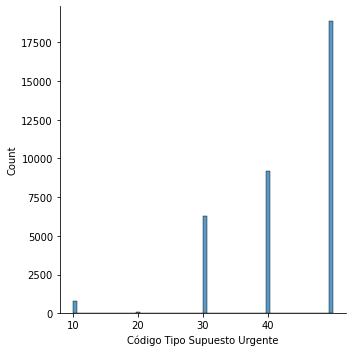

In [59]:
plt.figure(figsize=(15,10))
sns.displot(df_urgencias_corregido_prueba['Código Tipo Supuesto Urgente'])
plt.xticks(np.arange(10,50,step=10));

### 7.- My first Model (linearRegression)

In [60]:
X=df_urgencias_corregido_prueba[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y=df_urgencias_corregido_prueba['Código Tipo Supuesto Urgente']

In [ ]:
lin_reg = LinearRegression()   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lin_reg.fit(X_train, y_train)                           #   Entrenas/generas el modelo para determinar los coeficientes

print("Estos son los datos del test y del target:\n-----")
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)  

#    print("Estos son los datos del valor de y en x=0 y de las pendientes de cada gradiente de las variables:\n-----")
#    print(lin_reg.intercept_)
#    print(lin_reg.coef_)
coeff_df = pd.DataFrame(lin_reg.coef_,
                            X.columns,
                            columns=['Coefficient'])
print("-----\nEstos son las pendientes de cada gradiente visto en un Dataframe:")
print(coeff_df)

predictions = lin_reg.predict(X_test)                   #   Determino los resultados que deberían de dar con los valores guardados para
print("-----\nEl factor de correlacion de la regresión es: ",lin_reg.score(X_test, y_test))
print("-----\nErrores de las predicciones:")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("-----\nErrores de los tests:")
print('MAE:', metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, lin_reg.predict(X_train)))
print('MSE:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))

print("Esta es la importancia de las variables:\n-----")
features = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['coefficient'])
print(features.head().sort_values('coefficient', ascending=False))

Se observa en los datos que, efectivamente, un **módelo de regresión lineal** no es válido para este tipo de predicciones, ya que el coeficiente de correlación de la regresión es 0.268.

## CONCLUSIÓN: